### Step 1: Reading, Understanding and Visualizing the data

In [1]:
# Supressing the errors

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
# Reading the data set

bikes = pd.read_csv('day.csv')
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# Understading the shape of the data

bikes.shape

(730, 16)

In [6]:
# Seeing the basic info of the data set

bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# Understanding the statistical features of the data set

bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# Rounding off the decimal to 3 place
bikes = bikes.round(3)

In [9]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319248,23.726322,62.765168,12.763614,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150294,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424000,3.953000,0.000000,1.500000,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811750,16.889500,52.000000,9.042000,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.466000,24.368500,62.625000,12.125000,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880500,30.445500,72.989500,15.625750,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328000,42.045000,97.250000,34.000000,3410.000000,6946.000000,8714.000000


#### Lets see numeric and categorical columns count

In [10]:
len(bikes.describe().columns)

15

In [11]:
len(bikes.columns)

16

We can see that  many of the columns are numeric columns, let try to understand and work if they really are numeric columns
- we see four columns which are numeric, where during the model process it can interpret it as numeric columns with some order which can harm the predictive power of the model
- So, lets convert them into the categorical columns

In [12]:
#Lets first see the season columns
bikes.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [13]:
def map_season(x):
    return x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [14]:
bikes[['season']] = bikes[['season']].apply(map_season)

In [15]:
bikes.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [16]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(2)
memory usage: 91.4+ KB


In [17]:
#Lets treat month column

def map_mnth(x):
    return x.map({
        1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
        7:"Jul", 8:"Aug", 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'
    })

In [18]:
bikes[['mnth']] = bikes[['mnth']].apply(map_mnth)

In [19]:
bikes.mnth.value_counts()

Mar    62
Jul    62
Oct    62
Aug    62
Jan    62
Dec    62
May    62
Apr    60
Sep    60
Jun    60
Nov    60
Feb    56
Name: mnth, dtype: int64

In [20]:
bikes['weekday'].value_counts()


2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

In [21]:
#Lets treat weekday column
def map_weekday(x):
    return x.map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'sat'})

In [22]:
bikes[['weekday']] = bikes[['weekday']].apply(map_weekday)

In [23]:
bikes.weekday.value_counts()

Tue    105
Mon    105
Wed    104
Fri    104
sat    104
Thu    104
Sun    104
Name: weekday, dtype: int64

In [24]:
bikes.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [25]:
#Lets treat weathersit column
def map_weathersit(x):
    return x.map({1:'Clear', 2:'Mist', 3:'Light Snow', 4:'Heavy Rain'})

In [26]:
bikes[['weathersit']] = bikes[['weathersit']].apply(map_weathersit)

In [27]:
bikes.weathersit.value_counts()

Clear         463
Mist          246
Light Snow     21
Name: weathersit, dtype: int64

In [28]:
# Lets convert dteday to the appropriate type

bikes['dteday'] = bikes.dteday.astype('datetime64')

In [29]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [30]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,Jan,0,Mon,1,Mist,14.111,18.181,80.583,10.750,331,654,985
1,2,2018-02-01,spring,0,Jan,0,Tue,1,Mist,14.903,17.687,69.609,16.652,131,670,801
2,3,2018-03-01,spring,0,Jan,0,Wed,1,Clear,8.051,9.470,43.727,16.637,120,1229,1349
3,4,2018-04-01,spring,0,Jan,0,Thu,1,Clear,8.200,10.606,59.044,10.740,108,1454,1562
4,5,2018-05-01,spring,0,Jan,0,Fri,1,Clear,9.305,11.464,43.696,12.522,82,1518,1600


##### If we see above we can some of the predictors we notice that the some of the columns are categorical. But there data types is in int or flot. Lets convert them to the objet type.

In [31]:
bikes[['yr', 'holiday', 'workingday']] = bikes[['yr', 'holiday', 'workingday']].astype('object')

In [32]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    object        
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    object        
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    object        
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

### Visualising the data, to understand distribution of the data and realtionship between them

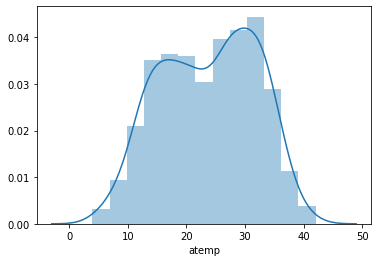

In [33]:
# Lets try to understand the distribution of the some important features

sns.distplot(bikes.atemp)
plt.show()

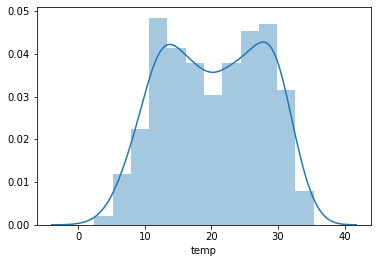

In [34]:
sns.distplot(bikes.temp)
plt.show()

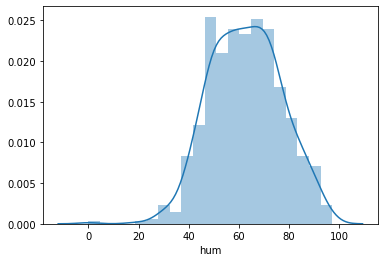

In [35]:
sns.distplot(bikes.hum)
plt.show()

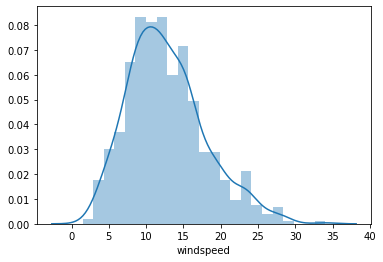

In [36]:
sns.distplot(bikes.windspeed)
plt.show()

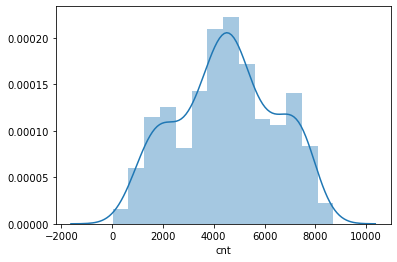

In [37]:
sns.distplot(bikes.cnt)
plt.show()

In [38]:
bikes_categoriacl = bikes.select_dtypes(exclude=['float', 'int64', 'datetime'])
bikes_categoriacl.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

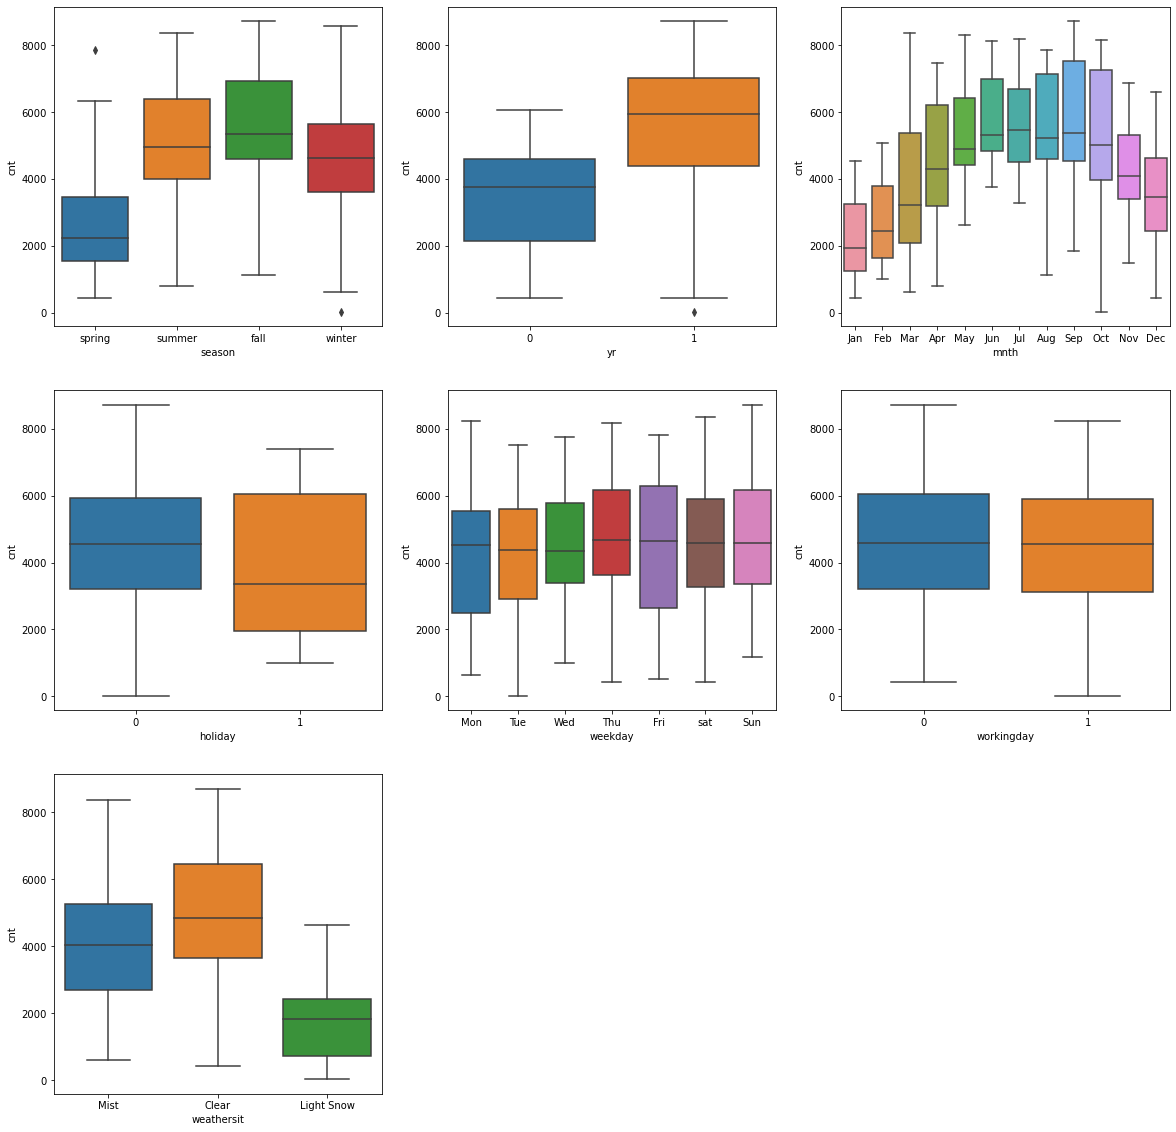

In [39]:
# Understanding the categorical variable distribution

plt.figure(figsize=(20, 20))
plt.subplot(331)
sns.boxplot(x='season', y='cnt', data=bikes)
plt.subplot(332)
sns.boxplot(x='yr', y='cnt', data=bikes)
plt.subplot(333)
sns.boxplot(x='mnth', y='cnt', data=bikes)
plt.subplot(334)
sns.boxplot(x='holiday', y='cnt', data=bikes)
plt.subplot(335)
sns.boxplot(x='weekday', y='cnt', data=bikes)
plt.subplot(336)
sns.boxplot(x='workingday', y='cnt', data=bikes)
plt.subplot(337)
sns.boxplot(x='weathersit', y='cnt', data=bikes)
plt.show()

##### For better understading of seasons, lets breakdown them in month wise:

- Spring - March, April, May
- Summer - June, July, August
- Fall/Autumn - September, October, November
- Winter - December, January, February

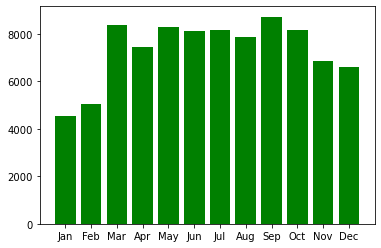

In [40]:
# Bar chart for the bikes rented over the year

plt.bar(bikes.mnth, bikes.cnt, color = 'green')
plt.show()

In [41]:
#Lets see the categorical variables
bikes_categoriacl.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit
0,spring,0,Jan,0,Mon,1,Mist
1,spring,0,Jan,0,Tue,1,Mist
2,spring,0,Jan,0,Wed,1,Clear
3,spring,0,Jan,0,Thu,1,Clear
4,spring,0,Jan,0,Fri,1,Clear


In [42]:
# Now convert the numeric int columns to the float just for the ease of categorizing the numeric columns

bikes[['casual', 'registered', 'cnt']] = bikes[['casual', 'registered', 'cnt']].astype('float64')
bikes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    object        
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    object        
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    object        
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    float64       
 14  registered  730 non-null    float64       
 15  cnt         730 non-null    float64       
dtypes: datetime64[ns](1), floa

In [43]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,Jan,0,Mon,1,Mist,14.111,18.181,80.583,10.750,331.0,654.0,985.0
1,2,2018-02-01,spring,0,Jan,0,Tue,1,Mist,14.903,17.687,69.609,16.652,131.0,670.0,801.0
2,3,2018-03-01,spring,0,Jan,0,Wed,1,Clear,8.051,9.470,43.727,16.637,120.0,1229.0,1349.0
3,4,2018-04-01,spring,0,Jan,0,Thu,1,Clear,8.200,10.606,59.044,10.740,108.0,1454.0,1562.0
4,5,2018-05-01,spring,0,Jan,0,Fri,1,Clear,9.305,11.464,43.696,12.522,82.0,1518.0,1600.0


In [44]:
bikes_numeric = bikes.select_dtypes(include=['float64'])
bikes_numeric.columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], dtype='object')

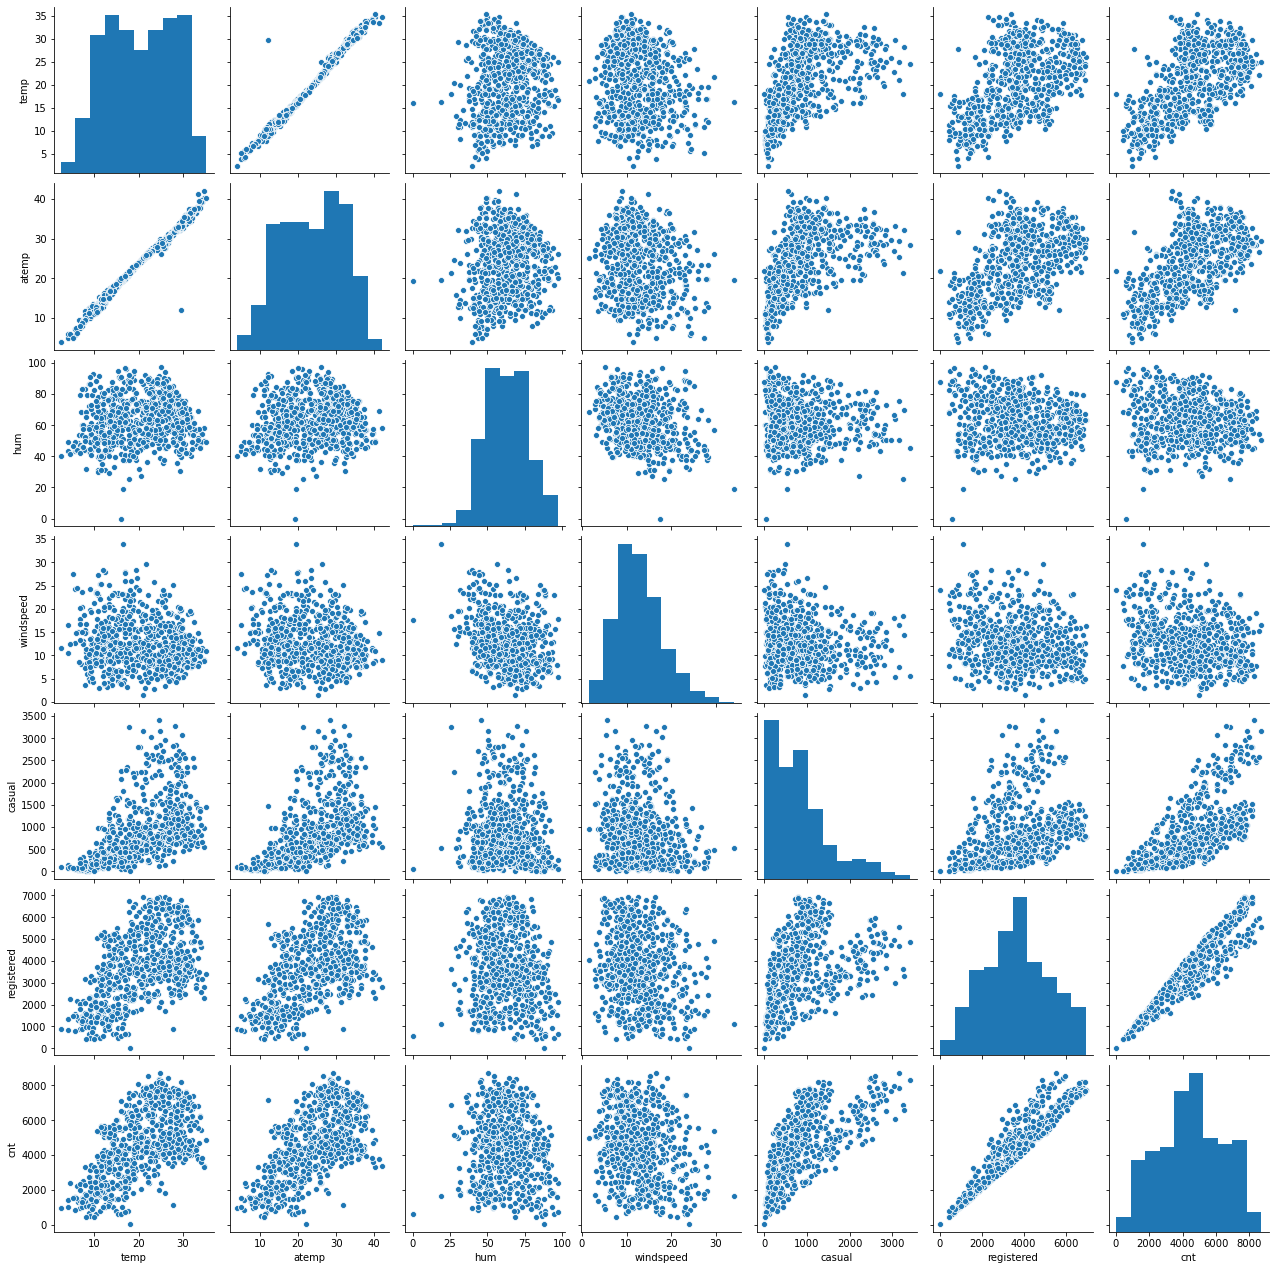

In [45]:
# Understanding the relationship and distribution of the numeric variable
sns.pairplot(bikes_numeric)
plt.show()

In [46]:
corr = bikes_numeric.corr()
corr

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128562,-0.158185,0.542729,0.539439,0.627045
atemp,0.991696,1.000000,0.141511,-0.183874,0.543361,0.543677,0.630684
hum,0.128562,0.141511,1.000000,-0.248508,-0.075211,-0.089212,-0.098542
windspeed,-0.158185,-0.183874,-0.248508,1.000000,-0.167998,-0.217912,-0.235132
casual,0.542729,0.543361,-0.075211,-0.167998,1.000000,0.394137,0.672123
registered,0.539439,0.543677,-0.089212,-0.217912,0.394137,1.000000,0.945411
cnt,0.627045,0.630684,-0.098542,-0.235132,0.672123,0.945411,1.000000


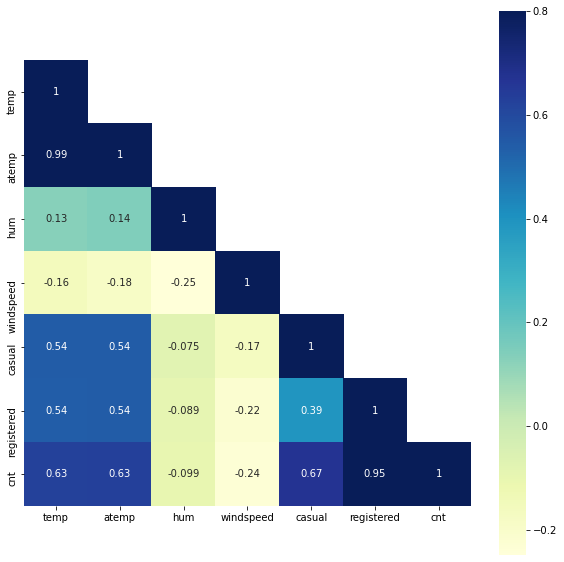

In [47]:
#Lets correlation of the numeric variables

mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(corr, annot=True, vmax=0.8, square=True, mask=mask, cmap='YlGnBu')
plt.show()


Firstly, as we know that we chose our target vaiable to be `cnt`
- From the above graphs it is evident that temp and atemp are correlated samely to our target variable.
- Also the feature 'Causal' and 'registered' summation becomes 'cnt'. Hence, they too correlated to the 'cnt' at a good amount.

Therefore, we know that the atemp, casual and registered creates a problem of collinearity. so lets drop them..

In [48]:
# droping collinear columns

bikes.drop(['atemp', 'casual', 'registered'], axis = 1, inplace=True)

In [49]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,2018-01-01,spring,0,Jan,0,Mon,1,Mist,14.111,80.583,10.750,985.0
1,2,2018-02-01,spring,0,Jan,0,Tue,1,Mist,14.903,69.609,16.652,801.0
2,3,2018-03-01,spring,0,Jan,0,Wed,1,Clear,8.051,43.727,16.637,1349.0
3,4,2018-04-01,spring,0,Jan,0,Thu,1,Clear,8.200,59.044,10.740,1562.0
4,5,2018-05-01,spring,0,Jan,0,Fri,1,Clear,9.305,43.696,12.522,1600.0


In terms of model building, we see have no use of columns 'Instant' and 'dteday'. so we will drop them

In [50]:
bikes.drop(['instant', 'dteday'], inplace=True, axis=1)

In [51]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Mist,14.111,80.583,10.750,985.0
1,spring,0,Jan,0,Tue,1,Mist,14.903,69.609,16.652,801.0
2,spring,0,Jan,0,Wed,1,Clear,8.051,43.727,16.637,1349.0
3,spring,0,Jan,0,Thu,1,Clear,8.200,59.044,10.740,1562.0
4,spring,0,Jan,0,Fri,1,Clear,9.305,43.696,12.522,1600.0


### Step 2: Preparing the data for the model


##### 1. Encoding:
-We can see that the our data is already encoded, for the variables which have 2 categories

##### 2. Get dummies - Let create the dummy variables for the categorical columns to convert them into numerical

In [52]:
list(bikes_categoriacl.columns)

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [53]:
#Creating dummies

df_dummies = pd.get_dummies(bikes_categoriacl, drop_first=True)


In [54]:
df_dummies.sample(10)

,season_spring,season_summer,season_winter,yr_1,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,...,holiday_1,weekday_Mon,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weekday_sat,workingday_1,weathersit_Light Snow,weathersit_Mist
493,0,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
643,0,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
511,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
55,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
125,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
569,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
267,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
636,0,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
54,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
435,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [55]:
list(df_dummies.columns.sort_values())

['holiday_1',
 'mnth_Aug',
 'mnth_Dec',
 'mnth_Feb',
 'mnth_Jan',
 'mnth_Jul',
 'mnth_Jun',
 'mnth_Mar',
 'mnth_May',
 'mnth_Nov',
 'mnth_Oct',
 'mnth_Sep',
 'season_spring',
 'season_summer',
 'season_winter',
 'weathersit_Light Snow',
 'weathersit_Mist',
 'weekday_Mon',
 'weekday_Sun',
 'weekday_Thu',
 'weekday_Tue',
 'weekday_Wed',
 'weekday_sat',
 'workingday_1',
 'yr_1']

In [56]:
bikes.weathersit.value_counts()

Clear         463
Mist          246
Light Snow     21
Name: weathersit, dtype: int64

After creating dummies what we can understand is wrt encoding:
    - mnth Apr - 000
    - weekday_Fri - 000
    - weathersit_clear - 000 (As we don't have any data for the Heavy Rain)

In [57]:
list(bikes.columns)

['season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'hum',
 'windspeed',
 'cnt']

In [58]:
bikes = pd.concat([bikes, df_dummies], axis=1)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,holiday_1,weekday_Mon,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weekday_sat,workingday_1,weathersit_Light Snow,weathersit_Mist
0,spring,0,Jan,0,Mon,1,Mist,14.111,80.583,10.750,...,0,1,0,0,0,0,0,1,0,1
1,spring,0,Jan,0,Tue,1,Mist,14.903,69.609,16.652,...,0,0,0,0,1,0,0,1,0,1
2,spring,0,Jan,0,Wed,1,Clear,8.051,43.727,16.637,...,0,0,0,0,0,1,0,1,0,0
3,spring,0,Jan,0,Thu,1,Clear,8.200,59.044,10.740,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,Jan,0,Fri,1,Clear,9.305,43.696,12.522,...,0,0,0,0,0,0,0,1,0,0


In [59]:
# Dropping the categorical variables, which are converted into numerical variables by creating into dummies
bikes.drop(bikes_categoriacl, axis=1, inplace=True)

In [60]:
bikes.shape

(730, 29)

##### 3. Splitting the data into test and train set

In [61]:
x = bikes.drop('cnt', axis = 1)
x.head()

,temp,hum,windspeed,season_spring,season_summer,season_winter,yr_1,mnth_Aug,mnth_Dec,mnth_Feb,...,holiday_1,weekday_Mon,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weekday_sat,workingday_1,weathersit_Light Snow,weathersit_Mist
0,14.111,80.583,10.750,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,14.903,69.609,16.652,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
2,8.051,43.727,16.637,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,8.200,59.044,10.740,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,9.305,43.696,12.522,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [62]:
y = bikes.cnt
y.head()

0     985.0
1     801.0
2    1349.0
3    1562.0
4    1600.0
Name: cnt, dtype: float64

In [63]:
y.shape

(730,)

In [64]:
x.shape

(730, 28)

In [65]:
from sklearn.model_selection import train_test_split


In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [67]:
x_train.shape

(511, 28)

In [68]:
x_test.shape

(219, 28)

In [69]:
y_train.shape

(511,)

In [70]:
y_train.shape

(511,)

#####  4. Scaling of the predictor variables on the training and testing set

In [71]:
from sklearn.preprocessing import MinMaxScaler

In [72]:
num_var = ['temp', 'hum', 'windspeed']

In [73]:
scaler = MinMaxScaler()
x_train[num_var] = scaler.fit_transform(x_train[num_var])
x_train.head()

,temp,hum,windspeed,season_spring,season_summer,season_winter,yr_1,mnth_Aug,mnth_Dec,mnth_Feb,...,holiday_1,weekday_Mon,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weekday_sat,workingday_1,weathersit_Light Snow,weathersit_Mist
235,0.753881,0.488397,0.527980,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
524,0.802875,0.254632,0.255430,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
12,0.089509,0.301045,0.647938,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
161,0.821396,0.557418,0.281896,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
556,0.810494,0.527835,0.274083,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [74]:
x_test[num_var] = scaler.transform(x_test[num_var])
x_test.head()

,temp,hum,windspeed,season_spring,season_summer,season_winter,yr_1,mnth_Aug,mnth_Dec,mnth_Feb,...,holiday_1,weekday_Mon,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weekday_sat,workingday_1,weathersit_Light Snow,weathersit_Mist
196,0.771286,0.460554,0.415872,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
187,0.854069,0.552782,0.292774,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
14,0.178828,0.340484,0.289709,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
31,0.125020,0.801011,0.027326,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,1
390,0.320391,0.717511,0.077904,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


### Step 3: Building the model

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
regressor = LinearRegression()

regressor.fit(x_train, y_train)

LinearRegression()

In [77]:
# Finding the co-eff of predictor variables 

coeff_df = pd.DataFrame(regressor.coef_, index=x.columns, columns=['CoEffiecient'])

coeff_df

,CoEffiecient
temp,3693.410412
hum,-1220.299588
windspeed,-1158.144614
season_spring,-824.309186
season_summer,-34.123820
season_winter,499.154635
yr_1,1921.239594
mnth_Aug,-238.336388
mnth_Dec,-428.892243
mnth_Feb,-435.076150


In [78]:
# Interscept of the linear regression

regressor.intercept_

3729.289700855113

In [79]:
# Predictions

y_pred = regressor.predict(x_test)

In [80]:
df1 = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df1

,Actual,Predicted
196,5923.0,4040.415074
187,4592.0,4719.298360
14,1248.0,1107.490426
31,1360.0,1039.968445
390,4075.0,3679.908278
...,...,...
155,4906.0,4029.649150
391,3456.0,3409.965240
571,6861.0,6364.758727
306,3974.0,3743.972269


In [81]:
# Evaluating the Algorithm

from sklearn import metrics

print("Mean Absolute Error:" , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 581.4542385937181
Mean Squared Error: 589841.6363731468
Root Mean Squared Error: 768.0114819279376


In [82]:
# Evauating the significance of the model

yhat = regressor.predict(x_train)
ss_residual = sum((y_train-yhat)**2)
ss_total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(ss_residual)/ss_total)
adjusted_r_squared = 1 - ((1-r_squared)*(len(y_train)-1))/((len(y_train)-x_train.shape[1]-1))
print(r_squared, adjusted_r_squared)

0.8348675080285556 0.8252747491588451


In [83]:
yhat = regressor.predict(x_test)
ss_residual = sum((y_test-yhat)**2)
ss_total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(ss_residual))/ss_total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.8593962368503694 0.8386756822809501


### Building the model through RFE

We have around 28 features, out of these lets start choosing few features(Arbitarily Chosen) to determine the best fetures

In [84]:
x_train.shape

(511, 28)

In [85]:
x_train.columns.values

array(['temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_1', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'holiday_1', 'weekday_Mon',
       'weekday_Sun', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed',
       'weekday_sat', 'workingday_1', 'weathersit_Light Snow',
       'weathersit_Mist'], dtype=object)

In [86]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [87]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

##### Lets build the model by choosing the 24 features at first

### Building the Linear Model 1

In [88]:
rfe = RFE(lm, 24)
rfe = rfe.fit(x_train, y_train)

In [89]:
rfe.support_

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True, False,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True])

In [90]:
rfe.ranking_

array([1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 2, 1, 1, 1, 1, 3,
       1, 1, 1, 1, 1, 1])

In [91]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 4),
 ('season_winter', True, 1),
 ('yr_1', True, 1),
 ('mnth_Aug', True, 1),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', True, 1),
 ('mnth_Mar', False, 5),
 ('mnth_May', True, 1),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 2),
 ('mnth_Sep', True, 1),
 ('holiday_1', True, 1),
 ('weekday_Mon', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 3),
 ('weekday_Tue', True, 1),
 ('weekday_Wed', True, 1),
 ('weekday_sat', True, 1),
 ('workingday_1', True, 1),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist', True, 1)]

In [92]:
(rfe.support_ == True).sum()

24

In [93]:
(rfe.support_ == False).sum()

4

In [94]:
x_train.columns[rfe.support_]

Index(['temp', 'hum', 'windspeed', 'season_spring', 'season_winter', 'yr_1',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun',
       'mnth_May', 'mnth_Nov', 'mnth_Sep', 'holiday_1', 'weekday_Mon',
       'weekday_Sun', 'weekday_Tue', 'weekday_Wed', 'weekday_sat',
       'workingday_1', 'weathersit_Light Snow', 'weathersit_Mist'],
      dtype='object')

In [95]:
x_train_rfe = x_train[x_train.columns[rfe.support_]]

In [96]:
x_train_rfe.head()

,temp,hum,windspeed,season_spring,season_winter,yr_1,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,...,mnth_Sep,holiday_1,weekday_Mon,weekday_Sun,weekday_Tue,weekday_Wed,weekday_sat,workingday_1,weathersit_Light Snow,weathersit_Mist
235,0.753881,0.488397,0.527980,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
524,0.802875,0.254632,0.255430,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
12,0.089509,0.301045,0.647938,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
161,0.821396,0.557418,0.281896,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
556,0.810494,0.527835,0.274083,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Writing a function to build model using "OLS" and to calculate "VIF"

In [97]:
def build_model(x, y):
    x = sm.add_constant(x) # Adding the constant
    lm = sm.OLS(y, x).fit() # Fitting the model
    print(lm.summary()) # Model Summary
    return x

def checkVIF(x):
    vif = pd.DataFrame()
    vif['Features'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending = False)
    return (vif)

In [98]:
X_train_new = build_model(x_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     102.2
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          8.74e-173
Time:                        23:39:47   Log-Likelihood:                -4118.6
No. Observations:                 511   AIC:                             8287.
Df Residuals:                     486   BIC:                             8393.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3741.73

In [99]:
checkVIF(X_train_new)

,Features,VIF
0,const,285.01
22,workingday_1,47.82
21,weekday_sat,27.82
18,weekday_Sun,26.94
1,temp,7.24
16,holiday_1,5.19
4,season_spring,4.08
11,mnth_Jul,2.90
5,season_winter,2.86
12,mnth_Jun,2.61


After building the model with the top 24 features, what we can see is that there quite a few features whose 'P-value' is greater than 5% and also we see few features with 'VIF' greater than 5. 
So, we can say that our model is not the good one though the R-Square is over 80% 

##### Now, lets build the model by reducing the top features to our model to 20.


### Building the Linear Model 2

In [100]:
rfe2 = RFE(lm, 20)
rfe2 = rfe2.fit(x_train, y_train)

In [101]:
list(zip(x_train.columns, rfe2.support_, rfe2.ranking_))

[('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 8),
 ('season_winter', True, 1),
 ('yr_1', True, 1),
 ('mnth_Aug', True, 1),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', True, 1),
 ('mnth_Mar', False, 9),
 ('mnth_May', False, 2),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 6),
 ('mnth_Sep', True, 1),
 ('holiday_1', True, 1),
 ('weekday_Mon', False, 3),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 7),
 ('weekday_Tue', False, 4),
 ('weekday_Wed', False, 5),
 ('weekday_sat', True, 1),
 ('workingday_1', True, 1),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist', True, 1)]

In [102]:
x_train_rfe2 = x_train[x_train.columns[rfe2.support_]]
x_train_rfe2.head()

,temp,hum,windspeed,season_spring,season_winter,yr_1,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Nov,mnth_Sep,holiday_1,weekday_Sun,weekday_sat,workingday_1,weathersit_Light Snow,weathersit_Mist
235,0.753881,0.488397,0.527980,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
524,0.802875,0.254632,0.255430,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
12,0.089509,0.301045,0.647938,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
161,0.821396,0.557418,0.281896,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
556,0.810494,0.527835,0.274083,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [103]:
x_train_new2 = build_model(x_train_rfe2, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     121.5
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          2.31e-175
Time:                        23:39:48   Log-Likelihood:                -4122.4
No. Observations:                 511   AIC:                             8287.
Df Residuals:                     490   BIC:                             8376.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3627.14

In [104]:
checkVIF(x_train_new2)

,Features,VIF
0,const,278.77
18,workingday_1,47.34
17,weekday_sat,27.10
16,weekday_Sun,26.24
1,temp,6.19
15,holiday_1,5.18
4,season_spring,3.82
10,mnth_Jan,2.40
5,season_winter,2.40
2,hum,2.21


Not the super improvement over the model 1, but definitley there is an some improvement when comes to the number of features with highest "P-Value"

Let try building another model by reducing few more features. 

### Building the Linear Model 3

This time lets build the model with 17 features

In [105]:
rfe3 = RFE(lm, 17)
rfe3 = rfe3.fit(x_train, y_train)

In [106]:
list(zip(x_train.columns, rfe3.support_, rfe3.ranking_))

[('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 11),
 ('season_winter', True, 1),
 ('yr_1', True, 1),
 ('mnth_Aug', True, 1),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', True, 1),
 ('mnth_Mar', False, 12),
 ('mnth_May', False, 5),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 9),
 ('mnth_Sep', False, 4),
 ('holiday_1', True, 1),
 ('weekday_Mon', False, 6),
 ('weekday_Sun', False, 3),
 ('weekday_Thu', False, 10),
 ('weekday_Tue', False, 7),
 ('weekday_Wed', False, 8),
 ('weekday_sat', False, 2),
 ('workingday_1', True, 1),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist', True, 1)]

In [107]:
x_train_rfe3 = x_train[x_train.columns[rfe3.support_ == True]]
x_train_rfe3.head()

,temp,hum,windspeed,season_spring,season_winter,yr_1,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Nov,holiday_1,workingday_1,weathersit_Light Snow,weathersit_Mist
235,0.753881,0.488397,0.527980,0,0,0,1,0,0,0,0,0,0,0,1,0,0
524,0.802875,0.254632,0.255430,0,0,1,0,0,0,0,0,1,0,0,0,0,0
12,0.089509,0.301045,0.647938,1,0,0,0,0,0,1,0,0,0,0,0,0,0
161,0.821396,0.557418,0.281896,0,0,0,0,0,0,0,0,1,0,0,1,0,0
556,0.810494,0.527835,0.274083,0,0,1,0,0,0,0,1,0,0,0,1,0,0


In [108]:
x_train_new3 = build_model(x_train_rfe3, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     142.5
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          9.26e-178
Time:                        23:39:49   Log-Likelihood:                -4124.4
No. Observations:                 511   AIC:                             8285.
Df Residuals:                     493   BIC:                             8361.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3216.76

In [109]:
checkVIF(x_train_new3)

,Features,VIF
0,const,48.93
1,temp,5.45
4,season_spring,3.81
5,season_winter,2.38
10,mnth_Jan,2.37
2,hum,2.21
9,mnth_Feb,1.96
13,mnth_Nov,1.86
11,mnth_Jul,1.82
12,mnth_Jun,1.67


Now our model 3 looks reasonably good, but not good enough yet.
With respect to the P-value our model is really doing good. But, when comes to multi-collinearity we still see couple of variables which are highly co-related to the other variables in the model.

Let try to fix that in our model 4

### Buiding the Linear Model 4

Lets build this model with 15 predictor varaibles



In [110]:
rfe4 = RFE(lm, 16)
rfe4 = rfe4.fit(x_train, y_train)

In [111]:
list(zip(x_train.columns, rfe4.support_, rfe4.ranking_))

[('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 12),
 ('season_winter', True, 1),
 ('yr_1', True, 1),
 ('mnth_Aug', True, 1),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', True, 1),
 ('mnth_Mar', False, 13),
 ('mnth_May', False, 6),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 10),
 ('mnth_Sep', False, 5),
 ('holiday_1', True, 1),
 ('weekday_Mon', False, 7),
 ('weekday_Sun', False, 4),
 ('weekday_Thu', False, 11),
 ('weekday_Tue', False, 8),
 ('weekday_Wed', False, 9),
 ('weekday_sat', False, 3),
 ('workingday_1', False, 2),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist', True, 1)]

In [112]:
x_train_rfe4 = x_train[x_train.columns[rfe4.support_ == True]]
x_train_rfe4.head()

,temp,hum,windspeed,season_spring,season_winter,yr_1,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Nov,holiday_1,weathersit_Light Snow,weathersit_Mist
235,0.753881,0.488397,0.527980,0,0,0,1,0,0,0,0,0,0,0,0,0
524,0.802875,0.254632,0.255430,0,0,1,0,0,0,0,0,1,0,0,0,0
12,0.089509,0.301045,0.647938,1,0,0,0,0,0,1,0,0,0,0,0,0
161,0.821396,0.557418,0.281896,0,0,0,0,0,0,0,0,1,0,0,0,0
556,0.810494,0.527835,0.274083,0,0,1,0,0,0,0,1,0,0,0,0,0


In [113]:
x_train_new4 = build_model(x_train_rfe4, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     148.6
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          5.30e-177
Time:                        23:39:50   Log-Likelihood:                -4128.8
No. Observations:                 511   AIC:                             8292.
Df Residuals:                     494   BIC:                             8364.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3059.44

In [114]:
checkVIF(x_train_new4)

,Features,VIF
0,const,46.58
1,temp,5.45
4,season_spring,3.80
5,season_winter,2.38
10,mnth_Jan,2.36
2,hum,2.19
9,mnth_Feb,1.96
13,mnth_Nov,1.85
11,mnth_Jul,1.82
12,mnth_Jun,1.67


We still see the high VIF for 1 varibales or multi-collinearity

### Buiding the Linear Model 5

In [115]:
rfe5 = RFE(lm, 15)
rfe5 = rfe5.fit(x_train, y_train)

In [116]:
list(zip(x_train.columns, rfe5.support_, rfe5.ranking_))

[('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 13),
 ('season_winter', True, 1),
 ('yr_1', True, 1),
 ('mnth_Aug', True, 1),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', True, 1),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 7),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 11),
 ('mnth_Sep', False, 6),
 ('holiday_1', True, 1),
 ('weekday_Mon', False, 8),
 ('weekday_Sun', False, 5),
 ('weekday_Thu', False, 12),
 ('weekday_Tue', False, 9),
 ('weekday_Wed', False, 10),
 ('weekday_sat', False, 4),
 ('workingday_1', False, 3),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist', False, 2)]

In [117]:
x_train_rfe5 = x_train[x_train.columns[rfe5.support_ == True]]
x_train_rfe5.head()

,temp,hum,windspeed,season_spring,season_winter,yr_1,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Nov,holiday_1,weathersit_Light Snow
235,0.753881,0.488397,0.527980,0,0,0,1,0,0,0,0,0,0,0,0
524,0.802875,0.254632,0.255430,0,0,1,0,0,0,0,0,1,0,0,0
12,0.089509,0.301045,0.647938,1,0,0,0,0,0,1,0,0,0,0,0
161,0.821396,0.557418,0.281896,0,0,0,0,0,0,0,0,1,0,0,0
556,0.810494,0.527835,0.274083,0,0,1,0,0,0,0,1,0,0,0,0


In [118]:
x_train_new5 = build_model(x_train_rfe5, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     153.4
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          4.81e-175
Time:                        23:39:51   Log-Likelihood:                -4136.2
No. Observations:                 511   AIC:                             8304.
Df Residuals:                     495   BIC:                             8372.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3146.42

In [119]:
checkVIF(x_train_new5)

,Features,VIF
0,const,46.15
1,temp,5.15
4,season_spring,3.79
5,season_winter,2.38
10,mnth_Jan,2.36
9,mnth_Feb,1.96
13,mnth_Nov,1.83
11,mnth_Jul,1.79
8,mnth_Dec,1.64
12,mnth_Jun,1.64


#### Finally we can say we came to a good model with the proper predictor variables, whose 'P-Value' and 'VIF' are within permissable

### Step 4: Residual Analysis on the training data

In [120]:
x_train.head()

,temp,hum,windspeed,season_spring,season_summer,season_winter,yr_1,mnth_Aug,mnth_Dec,mnth_Feb,...,holiday_1,weekday_Mon,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weekday_sat,workingday_1,weathersit_Light Snow,weathersit_Mist
235,0.753881,0.488397,0.527980,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
524,0.802875,0.254632,0.255430,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
12,0.089509,0.301045,0.647938,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
161,0.821396,0.557418,0.281896,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
556,0.810494,0.527835,0.274083,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [121]:
lm = LinearRegression()
lm.fit(x_train_new5, y_train)

LinearRegression()

In [122]:
# Predicting the y values on the x data

y_pred = lm.predict(x_train_new5)

In [123]:
# Calculation the Residuals

errors = y_pred - y_train

Assumptioms:
    Error terms should be normally distributed

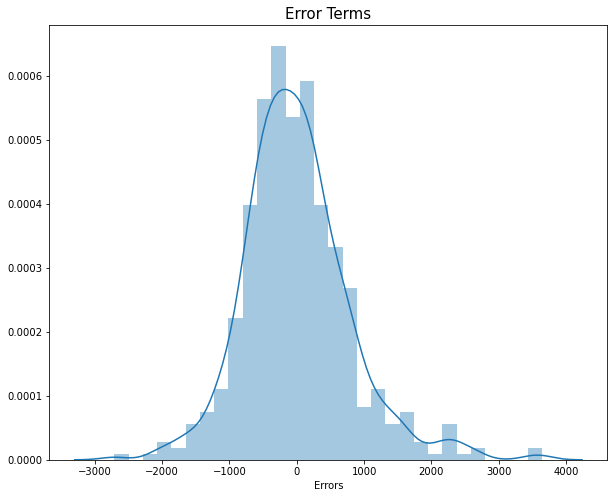

In [124]:
# Lets validate this assumption

plt.figure(figsize=(10, 8))
sns.distplot(errors)
plt.xlabel("Errors")
plt.title("Error Terms", fontsize = 15)
plt.show()

Hence, From the above graph we can conclude that the errors are indeed normally distributed

### Step 5: Evaluating the model

As we already divided initailly into Test and Training Sets and also scaled our numeric variable. Lets proceed into the prediction and evaluation

In [125]:
x_test.head()

,temp,hum,windspeed,season_spring,season_summer,season_winter,yr_1,mnth_Aug,mnth_Dec,mnth_Feb,...,holiday_1,weekday_Mon,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weekday_sat,workingday_1,weathersit_Light Snow,weathersit_Mist
196,0.771286,0.460554,0.415872,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
187,0.854069,0.552782,0.292774,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
14,0.178828,0.340484,0.289709,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
31,0.125020,0.801011,0.027326,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,1
390,0.320391,0.717511,0.077904,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [126]:
# Adding the constant variable

x_test_new = sm.add_constant(x_test)

In [127]:
lm = LinearRegression()

In [128]:
lm.fit(x_test_new, y_test)

LinearRegression()

In [129]:
# Making the prediction on test set

y_pred_tst = lm.predict(x_test_new)

In [130]:
# Lets check the R2 score to understand the goodness of the model

from sklearn.metrics import r2_score

r2_score = r2_score(y_test, y_pred_tst)
print('R Square:', r2_score)

R Square: 0.8957556309272005


#### From R Square(Almost 90%) it is evident that our model is significant and reliable

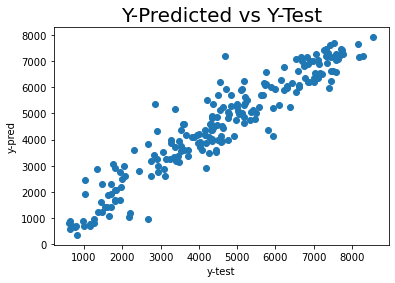

In [131]:
# Plotting y_test VS y_pred to understand the spread of the data

plt.scatter(y_test, y_pred_tst)
plt.xlabel("y-test")
plt.ylabel("y-pred")
plt.title("Y-Predicted vs Y-Test", fontsize=20)
plt.show()